<a href="https://colab.research.google.com/github/Bhavana0929/Amenity-Detection/blob/main/04-experimenting-with-pretrained-detectron2-modelzoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Packages
import os
import pandas as pd
import random
import cv2
import sys
# Install PyTorch and torchvision
# You need to install PyTorch and torchvision first, as Detectron2 depends on them
!pip install torch torchvision
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)

  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: nvidia-cusparse-cu12 12.5.1.3
    Uninstalling nvidia-cusparse-cu12-12.5.1.3:
      Successfully uninstalled nvidia-cusparse-cu12-12.5.1.3
  Attempting uninstall: nvidia-cusolver-cu12
    

In [2]:
# Install Detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ji2fogv6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ji2fogv6
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.1 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311

In [1]:
# Install Cython and PyYAML
# Cython is used for compiling parts of the code, and PyYAML is used for configuration parsing.
!pip install cython pyyaml
# Install COCO API
# The COCO API is another dependency, and it's installed via GitHub. This API is used for handling datasets in the COCO format.
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

import detectron2
print("Detectron2 version:", detectron2.__version__)
!gcc --version

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-tiewomb3
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-tiewomb3
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp311-cp311-linux_x86_64.whl size=399219 sha256=f1583e3120b7d4d91060eed04f0cf3e85563f849d57667f20e04696169ff7cb3
  Stored in directory: /tmp/pip-ephem-wheel-cache-k37oupdg/wheels/6d/69/75/358c50a37672dfda8d74ba3b30ec49fb75d52f7c081886d503
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [2]:
# Import Detectron2/requirements
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import os
import pandas as pd

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [3]:
# import torch/torchvision
import torch, torchvision
torch.__version__
!gcc --version

# Install wget,OpenCV,tqdm,awscli
!pip install wget
!pip install opencv-python
!pip install tqdm awscli


# Import CV2 for getting height & width of image
import cv2
# Import Detectron2 BoxMode for bounding boxes style
from detectron2.structures import BoxMode

# WandB - Install the W&B library
!pip install wandb -q
import wandb
# wandb - Login to wandb account so all metrics can be logged
!wandb login

# Download required meta-files for V5 - https://storage.googleapis.com/openimages/web/download.html

# # Training bounding boxes (1.11G)
!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

# # Validating bounding boxes (23.94M)
!wget https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv

# # Testing bounding boxes (73.89M)
!wget https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv

# # Class Names (11.73K)
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=505b5530c9d2b00fa873745924ff226868a283d249aaf860aa1044ec9b924c38
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled

In [4]:
# Classes of amenities Airbnb mostly cares about
subset = ["Toilet",
          "Swimming_pool",
          "Bed",
          "Billiard_table",
          "Sink",
          "Fountain",
          "Oven",
          "Ceiling_fan",
          "Television",
          "Microwave_oven",
          "Gas_stove",
          "Refrigerator",
          "Kitchen_&_dining_room_table",
          "Washing_machine",
          "Bathtub",
          "Stairs",
          "Fireplace",
          "Pillow",
          "Mirror",
          "Shower",
          "Couch",
          "Countertop",
          "Coffeemaker",
          "Dishwasher",
          "Sofa_bed",
          "Tree_house",
          "Towel",
          "Porch",
          "Wine_rack",
          "Jacuzzi"]

In [5]:
# To download the Open Images, using the following script:
!wget https://raw.githubusercontent.com/spmallick/learnopencv/refs/heads/master/downloadOpenImages/downloadOI.py

!python3 downloadOI.py --classes 'Coffeemaker,Bathtub' --mode validation
!python3 downloadOI.py --classes 'Coffeemaker,Bathtub' --mode train
target_classes=["Coffeemaker", "Bathtub", "Tree house"]
target_classes.sort()
valid_path = "validation"
train_path = "train"

--2025-02-03 20:39:23--  https://raw.githubusercontent.com/spmallick/learnopencv/refs/heads/master/downloadOpenImages/downloadOI.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3555 (3.5K) [text/plain]
Saving to: ‘downloadOI.py’

downloadOI.py       100%[===================>]   3.47K  --.-KB/s    in 0s      

2025-02-03 20:39:24 (58.8 MB/s) - ‘downloadOI.py’ saved [3555/3555]

Class 0 : Coffeemaker
Class 1 : Bathtub
Annotation Count : 39
Number of images to be downloaded : 37
100% 37/37 [00:41<00:00,  1.12s/it]
Class 0 : Coffeemaker
Class 1 : Bathtub
Annotation Count : 868
Number of images to be downloaded : 766
100% 766/766 [08:44<00:00,  1.46it/s]


In [6]:
def get_image_ids(image_folder=None):
    import os
    """
    Explores a folder of images and gets their ID from their file name.
    Returns a list of all image ID's in image_folder.
    E.g. image_folder/608fda8c976e0ac.jpg -> ["608fda8c976e0ac"]

    Params
    ------
    image_folder (str): path to folder of images, e.g. "../validation/"
    """
    img_ids = []
    for root, dirs, files in os.walk(image_folder):
         for file in files:
           if ".jpg" in file:
             # Get the full path of each file
             img_id = os.path.splitext(file)[0]
             img_ids.append(img_id)
    return img_ids

# Make a function which formats a specific annotations csv based on what we're dealing with
def format_annotations(image_folder, annotation_file, target_classes=None):
    """
    TODO - NOTE: This function could (definitely can) be faster.
    TODO - Some ideas: skip the use of pandas entirely and use CSV's

    Formats annotation_file based on images contained in image_folder.
    Will get all unique image IDs and make sure annotation_file
    only contains those (the target images).
    Adds meta-data to annotation_file such as class names and categories.
    If target_classes isn't None, the returned annotations will be filtered by this list.
    Note: image_folder and annotation_file should both be validation if working on
    validation set or both be training if working on training set.

    Params
    ------
    image_folder (str): path to folder of target images.
    annotation_file (str): path to annotation file of target images.
    target_classes (list), optional: a list of target classes you'd like to filter labels.
    """
    # Get all image ids from target directory
    image_ids = get_image_ids(image_folder)

    # Setup annotation file and classnames
    annot_file = pd.read_csv(annotation_file)
    classes = pd.read_csv("class-descriptions-boxable.csv",
                          names=["LabelName", "ClassName"])

    # Create classname column on annotations which converts label codes to string labels
    annot_file["ClassName"] = annot_file["LabelName"].map(classes.set_index("LabelName")["ClassName"])

    # Make sure we only get the images we're concerned about
    if target_classes:
        annot_file = annot_file[annot_file["ImageID"].isin(image_ids) & annot_file["ClassName"].isin(target_classes)]
    else:
        annot_file = annot_file[annot_file["ImageID"].isin(image_ids)]

    # Add ClassID column, e.g. "Bathtub, Toilet" -> 1, 2
    annot_file["ClassID"] = pd.Categorical(annot_file["ClassName"]).codes

    return annot_file


# Write function to convert bounding boxes from relative to absolute
# Takes in x0, y0, x1, y1, height and width and converts from relative to absolute
def rel_to_absolute(bbox, height, width):
    """
    Converts bounding box dimensions from relative to absolute pixel values (Detectron2 style).
    See: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode

    Params
    ------
    bbox (array): relative dimensions of bounding box in format (x0, y0, x1, y1 or Xmin, Ymin, Xmax, Ymax)
    height (int): height of image
    width (int): width of image
    """
    bbox[0] = np.multiply(bbox[0], width) # x0
    bbox[1] = np.multiply(bbox[1], height) # y0
    bbox[2] = np.multiply(bbox[2], width) # x1
    bbox[3] = np.multiply(bbox[3], height) # y1
    return bbox


def get_image_filenames(image_folder):
  import os
  img_filenames = []
  for root, dirs, files in os.walk(image_folder):
    for file in files:
      if ".jpg" in file:
        # Get the full path of each file
        img_filename = os.path.join(root, file)
        img_filenames.append(img_filename)
  return img_filenames


# Next: functionise the below code
def get_image_dicts(image_folder):
    """
    Returns Detectron2 style labels of images in image_folder based on data in annotations.

    TODO -- Maybe create some verbosity here? AKA, what are the outputs?
    TODO -- what if annotations = None? Can we create a call to create an annotations CSV in 1 hit?

    Params
    ------
    image_folder (str): target folder containing images
    annotations (DataFrame): DataFrame of image label data
    """
    # Get annotations (automatically picks annotations CSV based on image_folder)
    annotations = format_annotations(image_folder,
                                     image_folder+"-annotations-bbox.csv",
                                     target_classes=subset) # TODO: this uses a global variable

    # Get all unique image ids from target folder
    img_ids = get_image_ids(image_folder)
    img_filenames = get_image_filenames(image_folder)

    my_dict = dict(zip(img_ids, img_filenames))

    # Start creating image dictionaries (Detectron2 style labelling)
    img_dicts = []
    for img_id,img_filename in my_dict.items():
        record = {}

        # Get image metadata
        file_name = img_filename
        img = img_id
        height, width = cv2.imread(file_name).shape[:2]
        img_data = annotations[annotations["ImageID"] == img].reset_index() # reset index important for images
                                                                            # with multiple objects
        # Update record dictionary
        record["file_name"] = file_name
        record["image_id"] = img
        record["height"] = height
        record["width"] = width

        # Create list of image annotations (labels)
        img_annotations = []
        for i in range(len(img_data)): # this is where we loop through examples with multiple objects in an image
            category_id = img_data.loc[i]["ClassID"]
            # Get bounding box coordinates in Detectron2 style (x0, y0, x1, y1)
            bbox = np.float32(img_data.loc[i][["XMin", "YMin", "XMax", "YMax"]].values) # needs to be float/int
            # Convert bbox from relative to absolute pixel dimensions
            bbox = rel_to_absolute(bbox=bbox, height=height, width=width)
            # Setup annot (1 annot = 1 label, there might be more) dictionary
            annot = {
                "bbox": bbox,
                "bbox_mode": BoxMode.XYXY_ABS, # See: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode.XYXY_ABS
                "category_id": category_id
            }
            img_annotations.append(annot)

        # Update record dictionary with annotations
        record["annotations"] = img_annotations

        # Add record dictionary with image annotations to img_dicts list
        img_dicts.append(record)
    return img_dicts

In [7]:
target_classes

['Bathtub', 'Coffeemaker', 'Tree house']

In [8]:
import json
def get_required_class_image_dicts(image_folder,target_classes):
    """
    Returns Detectron2 style labels of images in image_folder based on data in annotations.

    TODO -- Maybe create some verbosity here? AKA, what are the outputs?
    TODO -- what if annotations = None? Can we create a call to create an annotations CSV in 1 hit?

    Params
    ------
    image_folder (str): target folder containing images
    annotations (DataFrame): DataFrame of image label data
    """
    # Get annotations (automatically picks annotations CSV based on image_folder)
    annotations = format_annotations(image_folder,
                                     image_folder+"-annotations-bbox.csv",  # TODO: change for train/val
                                     target_classes=target_classes) # TODO: this uses a global variable

    print("Classes we're using: {}".format(annotations["ClassName"].value_counts()))

    # Get all unique image ids from target folder
    img_ids = get_image_ids(image_folder)
    img_filenames = get_image_filenames(image_folder)

    my_dict = dict(zip(img_ids, img_filenames))

    # Start creating image dictionaries (Detectron2 style labelling)
    img_dicts = []
    for img_id,img_filename in my_dict.items():
        record = {}

        # Get image metadata
        file_name = img_filename
        img = img_id
        height, width = cv2.imread(file_name).shape[:2]
        img_data = annotations[annotations["ImageID"] == img].reset_index() # reset index important for images
                                                                            # with multiple objects
        # Update record dictionary
        record["file_name"] = file_name
        record["image_id"] = img
        record["height"] = height
        record["width"] = width

        # Create list of image annotations (labels)
        img_annotations = []
        for i in range(len(img_data)): # this is where we loop through examples with multiple objects in an image
            category_id = img_data.loc[i]["ClassID"]
            # Get bounding box coordinates in Detectron2 style (x0, y0, x1, y1)
            bbox = np.float32(img_data.loc[i][["XMin", "YMin", "XMax", "YMax"]].values) # needs to be float/int
            # Convert bbox from relative to absolute pixel dimensions
            bbox = rel_to_absolute(bbox=bbox, height=height, width=width)
            # Setup annot (1 annot = 1 label, there might be more) dictionary
            annot = {
                "bbox": bbox,
                "bbox_mode": BoxMode.XYXY_ABS, # See: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode.XYXY_ABS
                "category_id": category_id
            }
            img_annotations.append(annot)

        # Update record dictionary with annotations
        record["annotations"] = img_annotations

        # Add record dictionary with image annotations to img_dicts list
        img_dicts.append(record)
    return img_dicts

In [10]:
train_path = "train"
valid_path = "validation"

train_img_dicts = get_required_class_image_dicts(train_path,target_classes)
val_img_dicts = get_required_class_image_dicts(valid_path,target_classes)
len(val_img_dicts), len(train_img_dicts)

Classes we're using: ClassName
Bathtub        545
Coffeemaker    323
Name: count, dtype: int64
Classes we're using: ClassName
Coffeemaker    21
Bathtub        18
Name: count, dtype: int64


(37, 766)

In [11]:
val_img_dicts[0], train_img_dicts[1]

({'file_name': 'validation/Bathtub/822f20d881eebeb9.jpg',
  'image_id': '822f20d881eebeb9',
  'height': 768,
  'width': 1024,
  'annotations': [{'bbox': array([   0.     ,  139.20001, 1024.     ,  739.19995], dtype=float32),
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'category_id': 0}]},
 {'file_name': 'train/Bathtub/0883f821518e2084.jpg',
  'image_id': '0883f821518e2084',
  'height': 1024,
  'width': 768,
  'annotations': [{'bbox': array([ 121.59975,  655.36   ,  702.08026, 1020.8    ], dtype=float32),
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'category_id': 0}]})

In [46]:
# Different models I'd like to try - https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md
models_to_try = {
    "R50-FPN-1x": "COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml",
    "R50-FPN-3x": "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml",
    "R101-FPN-3x": "COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml",
    "X101-FPN-3x": "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml",
    "RN-R50-1x": "COCO-Detection/retinanet_R_50_FPN_1x.yaml",
    "RN-R50-3x": "COCO-Detection/retinanet_R_50_FPN_3x.yaml",
    "RN-R101-3x": "COCO-Detection/retinanet_R_101_FPN_3x.yaml"
}

In [13]:
import logging
import os
import argparse
from collections import OrderedDict
import pandas as pd
import numpy as np
import torch
from torch.nn.parallel import DistributedDataParallel

import detectron2.utils.comm as comm
from detectron2.checkpoint import DetectionCheckpointer, PeriodicCheckpointer
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import (
    MetadataCatalog,
    build_detection_test_loader,
    build_detection_train_loader,
)
from detectron2.engine import default_argument_parser, default_setup, launch
from detectron2.evaluation import ( ### Changes from original, I don't need all the different evaluators
    COCOEvaluator,
    DatasetEvaluators,
    inference_on_dataset,
    print_csv_format
)
from detectron2.modeling import build_model
from detectron2.solver import build_lr_scheduler, build_optimizer
# Not sure what these do but they may help to track experiments
from detectron2.utils.events import (
    CommonMetricPrinter,
    EventStorage,
    JSONWriter,
    TensorboardXWriter
)

# Setup logger
logger = logging.getLogger("detectron2")

In [14]:
# Initialize Weights & Biases
import wandb
wandb.init(project="airbnb-object-detection",
           sync_tensorboard=True)

wandb: Currently logged in as: bhavanamarreddy (bhavanamarreddy-sir-c-r-reddy-college-of-engineering) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [15]:
from detectron2.data import DatasetCatalog, MetadataCatalog

def register_datasets(train_path, valid_path=None, target_classes=None):
  """
  Registers a Detectron2 style dataset from training paths.

  Params
  ------
  train_path (str) : pathname to training data containing training images
  valid_path (str) : pathname to validation data containing validation images
  """
  # TODO - update to accept any kind of path, e.g. not only coffeemaker, maybe could take a dict as input?
  # E.g. {"training": "path/to/training",
  #          "valid": "path/to/valid"}
  for d in [train_path, valid_path]:
    print("Registering: {}".format(d))
    DatasetCatalog.register(d, lambda d=d: get_required_class_image_dicts(d,target_classes))
    MetadataCatalog.get(d).set(thing_classes=target_classes)
  return MetadataCatalog.get(d)

In [16]:
cmaker_bathtub_metadata = register_datasets(train_path=train_path,
                                            valid_path=valid_path,
                                            target_classes=target_classes)

Registering: train
Registering: validation


In [17]:
# Check registered dataset
DatasetCatalog.list()

['coco_2014_train',
 'coco_2014_val',
 'coco_2014_minival',
 'coco_2014_valminusminival',
 'coco_2017_train',
 'coco_2017_val',
 'coco_2017_test',
 'coco_2017_test-dev',
 'coco_2017_val_100',
 'keypoints_coco_2014_train',
 'keypoints_coco_2014_val',
 'keypoints_coco_2014_minival',
 'keypoints_coco_2014_valminusminival',
 'keypoints_coco_2017_train',
 'keypoints_coco_2017_val',
 'keypoints_coco_2017_val_100',
 'coco_2017_train_panoptic_separated',
 'coco_2017_train_panoptic_stuffonly',
 'coco_2017_train_panoptic',
 'coco_2017_val_panoptic_separated',
 'coco_2017_val_panoptic_stuffonly',
 'coco_2017_val_panoptic',
 'coco_2017_val_100_panoptic_separated',
 'coco_2017_val_100_panoptic_stuffonly',
 'coco_2017_val_100_panoptic',
 'lvis_v1_train',
 'lvis_v1_val',
 'lvis_v1_test_dev',
 'lvis_v1_test_challenge',
 'lvis_v0.5_train',
 'lvis_v0.5_val',
 'lvis_v0.5_val_rand_100',
 'lvis_v0.5_test',
 'lvis_v0.5_train_cocofied',
 'lvis_v0.5_val_cocofied',
 'cityscapes_fine_instance_seg_train',
 'city

In [18]:
from google.colab.patches import cv2_imshow

In [19]:
def visualize_sample(data_dicts, metadata, n=1):
  """
  Show n random samples from data_dicts, label with metadata.
  """
  for d in random.sample(data_dicts, n):
    print(d)
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1],
                            metadata=metadata,
                            scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

{'file_name': 'train/Bathtub/02b8cd9599cec556.jpg', 'image_id': '02b8cd9599cec556', 'height': 685, 'width': 1024, 'annotations': [{'bbox': array([440.96   , 477.77313, 782.08   , 596.7364 ], dtype=float32), 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0}]}


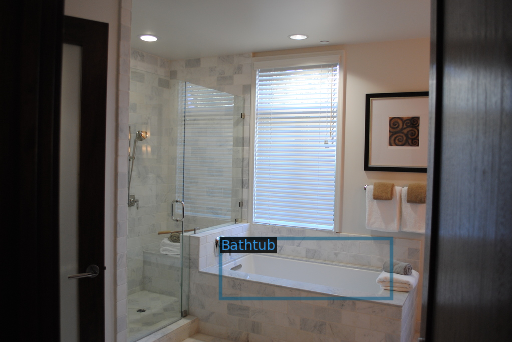

{'file_name': 'train/Coffeemaker/576a1a5ab4de547f.jpg', 'image_id': '576a1a5ab4de547f', 'height': 768, 'width': 1024, 'annotations': [{'bbox': array([423.04   , 224.63998, 677.12   , 641.27997], dtype=float32), 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 1}, {'bbox': array([692.48   , 177.92026, 896.     , 591.99976], dtype=float32), 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 1}]}


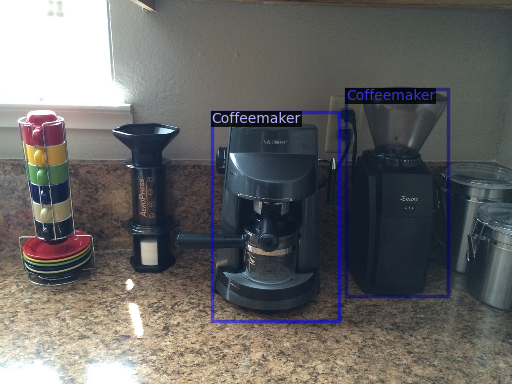

In [28]:
visualize_sample(train_img_dicts, cmaker_bathtub_metadata, n=2)

In [29]:
# Changed from original: Create evaluator for COCOEvaluator only
# Since we are only using bounding boxes to begin with, our evaluator can be simple COCO style
def get_evaluator(cfg, dataset_name, output_folder=None):
  """
  Create a COCOEvaluator
  """
  if output_folder is None:
    output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
  evaluator = COCOEvaluator(
      dataset_name=dataset_name,
      distributed=False,
      output_dir=output_folder
  )
  return evaluator

In [30]:
# Create testing function
def do_test(cfg, model):
  results = OrderedDict()
  for dataset_name in cfg.DATASETS.TEST:
    data_loader = build_detection_test_loader(cfg, dataset_name)
    # Create the evaluator
    evaluator = get_evaluator(
        cfg,
        dataset_name,
        output_folder=os.path.join(cfg.OUTPUT_DIR, "inference", dataset_name)
    )
    # Make inference on dataset
    results_i = inference_on_dataset(model,
                                     data_loader,
                                     evaluator)
    # Update results dictionary
    results[dataset_name] = results_i

    print("### Returning results_i...")
    print(results_i)
    #print(f"### Average Precision: {results_i['AP']}")
    # Let's get some communication happening
    if comm.is_main_process():
      logger.info("Evaluation results for {} in csv format:".format(dataset_name))
      ## wandb.log()? TODO/NOTE: This may be something Weights & Biases can track
      print("### Calculating results...")
      print_csv_format(results_i)

    # Check to see length of results
    if len(results) == 1:
      results = list(results.values())[0]
    print("### Returning results...")
    print(results)

    # TODO : log results_i dict with different parameters
    print("### Saving results to Weights & Biases...")
    wandb.log(results_i)

    return results

In [31]:
# Create training function
def do_train(cfg, model, resume=False):
  # Set model to training mode
  model.train()
  # Create optimizer from config file (returns torch.nn.optimizer.Optimizer)
  optimizer = build_optimizer(cfg, model)
  # Create scheduler for learning rate (returns torch.optim.lr._LR_scheduler)
  scheduler = build_lr_scheduler(cfg, optimizer)

  # Create checkpointer
  checkpointer = DetectionCheckpointer(
      model, save_dir=cfg.OUTPUT_DIR, optimizer=optimizer, scheduler=scheduler
  )

  # Create start iteration (refernces checkpointer) - https://detectron2.readthedocs.io/modules/checkpoint.html#detectron2.checkpoint.Checkpointer.resume_or_load
  start_iter = (
      # This can be 0
      checkpointer.resume_or_load(cfg.MODEL.WEIGHTS, # Use predefined model weights (pretrained model)
                                  resume=resume).get("iteration", -1) + 1
  )
  # Set max number of iterations
  max_iter = cfg.SOLVER.MAX_ITER

  # Create periodiccheckpoint
  periodic_checkpointer = PeriodicCheckpointer(checkpointer=checkpointer,
                                               # How often to make checkpoints?
                                               period=cfg.SOLVER.CHECKPOINT_PERIOD,
                                               max_iter=max_iter)

  # Create writers (for saving checkpoints?)
  writers = (
      [
       # Print out common metrics such as iteration time, ETA, memory, all losses, learning rate
       CommonMetricPrinter(max_iter=max_iter),
       # Write scalars to a JSON file such as loss values, time and more
       JSONWriter(os.path.join(cfg.OUTPUT_DIR, "metrics.json")),
       # Write all scalars such as loss values to a TensorBoard file for easy visualization
       TensorboardXWriter(cfg.OUTPUT_DIR),
      ]
      if comm.is_main_process()
      else []
  )

  ### Original note from script: ###
  # compared to "train_net.py", we do not support accurate timing and precise BN
  # here, because they are not trivial to implement

  # Build a training data loader based off the training dataset name in the config
  data_loader = build_detection_train_loader(cfg)

  # Start logging
  logger.info("Starting training from iteration {}".format(start_iter))

  # Store events
  with EventStorage(start_iter) as storage:
    # Loop through zipped data loader and iteration
    for data, iteration in zip(data_loader, range(start_iter, max_iter)):
      iteration = iteration + 1
      storage.step() # update stroage with step - https://detectron2.readthedocs.io/modules/utils.html#detectron2.utils.events.EventStorage.step

      # Create loss dictionary by trying to model data
      loss_dict = model(data)
      losses = sum(loss_dict.values())
      # Are losses infinite? If so, something is wrong
      assert torch.isfinite(losses).all(), loss_dict

      # TODO - Not quite sure what's happening here
      loss_dict_reduced = {k: v.item() for k, v in comm.reduce_dict(loss_dict).items()}
      # Sum up losses
      losses_reduced = sum(loss for loss in loss_dict_reduced.values())

      # # TODO: wandb.log()? log the losses
      # wandb.log({
      #     "Total loss": losses_reduced
      # })

      # Update storage
      if comm.is_main_process():
        # Store informate in storage - https://detectron2.readthedocs.io/modules/utils.html#detectron2.utils.events.EventStorage.put_scalars
        storage.put_scalars(total_loss=losses_reduced,
                            **loss_dict_reduced)

      # Start doing PyTorch things
      optimizer.zero_grad()
      losses.backward()
      optimizer.step()
      # Add learning rate to storage information
      storage.put_scalar("lr", optimizer.param_groups[0]["lr"], smoothing_hint=False)

      # Perform evaluation?
      if (
          cfg.TEST.EVAL_PERIOD > 0
          and iteration % cfg.TEST.EVAL_PERIOD == 0
          and iteration != max_iter
      ):
          do_test(cfg, model)
          # TODO - compared to "train_net.py", the test results are not dumped to EventStorage
          comm.synchronize()

      # Log different metrics with writers
      if iteration - start_iter > 5 and (iteration % 20 == 0 or iteration == max_iter):
        for writer in writers:
          writer.write()

      # Update the periodic_checkpointer
      periodic_checkpointer.step(iteration)

In [47]:
# Create setup function
def setup(args):
  """
  Create configs and perform basic setups.
  """
  cfg = get_cfg()
  cfg.merge_from_file(args.config_file) # This will take some kind of model.yaml file
  cfg.merge_from_list(args.opts)
  cfg.freeze()
  default_setup(
      cfg, args
  ) # this logs the config and arguments passed to the command line to the output file

  # Load config YAML as dict
  cfg_yaml = cfg.load_yaml_with_base(os.path.join(cfg.OUTPUT_DIR, "config.yaml"))

  # default_config = get_cfg()
  # default_config_loaded = default_config.load_yaml_with_base("output/config.yaml")
  # default_config_loaded

  # TODO: turn config into YAML and save to weights & biases
  # TODO: Init wandb and add configs
  # Setup a new weights & biases run every time we run the setup() function
  wandb.init(project="airbnb-object-detection",
            sync_tensorboard=True)
  print("### Printing config_yaml file to go into Weights & Biases")
  print(cfg_yaml)
  wandb.config.update(cfg_yaml)
  return cfg

In [48]:
# Create main function
def main(args):

  # Create the config file
  cfg = setup(args)

  # Build the model
  model = build_model(cfg)

  # Log what's going on
  logger.info("Model:\n{}".format(model))

  # TODO: Fix this (if it doesn't work)
  wandb.watch(model, log="all")

  # Only do evaluation if the args say so
  if args.eval_only:
    DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
        cfg.MODEL.WEIGHTS, resume=args.resume
    )
    return do_test(cfg, model)

  # Do distributed training? (depends on number of GPUs available)
  distributed = comm.get_world_size() > 1
  if distributed:
    # Put the model on multiple devices if available
    model = DistributedDataParallel(
        model,
        device_ids=[comm.get_local_rank()],
        broadcast_buffers=False
    )

  # Train the model
  do_train(cfg, model)
  # TODO - May want to evaluate in a different step?
  return do_test(cfg, model)

In [49]:
models_to_try

{'R50-FPN-1x': 'COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml',
 'R101-FPN-3x': 'COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'}

In [35]:
models_to_try["R50-FPN-1x"]

'COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml'

In [36]:
model_zoo.get_checkpoint_url('COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml')

'https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_1x/137257794/model_final_b275ba.pkl'

In [37]:
model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")

'/usr/local/lib/python3.11/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml'

In [50]:
# Setup arg parser
parser = default_argument_parser() # default in Detectron2

# Setup different weights and config files to try
weights = []
configs = []
for k, v in models_to_try.items():
  model = models_to_try[k]
  model_weights = model_zoo.get_checkpoint_url(model)
  weights.append(model_weights)
  config_file = model_zoo.get_config_file(model)
  configs.append(config_file)
weights_configs = dict(zip(weights, configs))
weights_configs

{'https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_1x/137257794/model_final_b275ba.pkl': '/usr/local/lib/python3.11/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml',
 'https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl': '/usr/local/lib/python3.11/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'}

In [51]:
# Setup different arg strings to pass to main()
workers = 2
ims_per_batch = 2
lr = 0.00025
max_iter = 3300
seed = 33
num_classes = len(target_classes)

arg_strings = []
for weights, config in weights_configs.items():
  arg_string = f"--config-file {config} \
                MODEL.WEIGHTS {weights} \
                DATASETS.TRAIN ('train',) \
                DATASETS.TEST ('validation',) \
                DATALOADER.NUM_WORKERS {workers} \
                SOLVER.IMS_PER_BATCH {ims_per_batch} \
                SOLVER.BASE_LR {lr} \
                SOLVER.MAX_ITER {max_iter} \
                SEED {seed} \
                MODEL.ROI_HEADS.NUM_CLASSES {num_classes}".split()
  arg_strings.append(arg_string)

In [52]:
# Create different arg parsers
arg_list = []
for arg_string in arg_strings:
  args = parser.parse_args(arg_string)
  print(args)
  arg_list.append(args)

Namespace(config_file='/usr/local/lib/python3.11/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml', resume=False, eval_only=False, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', 'https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_1x/137257794/model_final_b275ba.pkl', 'DATASETS.TRAIN', "('train',)", 'DATASETS.TEST', "('validation',)", 'DATALOADER.NUM_WORKERS', '2', 'SOLVER.IMS_PER_BATCH', '2', 'SOLVER.BASE_LR', '0.00025', 'SOLVER.MAX_ITER', '3300', 'SEED', '33', 'MODEL.ROI_HEADS.NUM_CLASSES', '3'])
Namespace(config_file='/usr/local/lib/python3.11/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml', resume=False, eval_only=False, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', 'https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6

In [53]:
arg_list[0]

Namespace(config_file='/usr/local/lib/python3.11/dist-packages/detectron2/model_zoo/configs/COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml', resume=False, eval_only=False, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', 'https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_1x/137257794/model_final_b275ba.pkl', 'DATASETS.TRAIN', "('train',)", 'DATASETS.TEST', "('validation',)", 'DATALOADER.NUM_WORKERS', '2', 'SOLVER.IMS_PER_BATCH', '2', 'SOLVER.BASE_LR', '0.00025', 'SOLVER.MAX_ITER', '3300', 'SEED', '33', 'MODEL.ROI_HEADS.NUM_CLASSES', '3'])

In [ ]:
for i, namespace in enumerate(arg_list):
  print(f"Running experiment: {1}") # derp......
  main(namespace)

Running experiment: 1
[02/03 21:11:13 detectron2]: Rank of current process: 0. World size: 1
[02/03 21:11:13 detectron2]: Rank of current process: 0. World size: 1
[02/03 21:11:13 detectron2]: Environment info:
-------------------------------  -----------------------------------------------------------------
sys.platform                     linux
Python                           3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
numpy                            1.26.4
detectron2                       0.6 @/usr/local/lib/python3.11/dist-packages/detectron2
Compiler                         GCC 11.4
CUDA compiler                    CUDA 12.5
detectron2 arch flags            7.5
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          2.5.1+cu124 @/usr/local/lib/python3.11/dist-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            Tesla T4 (arch=7.5)
Driver versio